# Water Potability

## Introduction

An important aspect of life is access to safe drinking water. In many places around the world, people do not have easy access, or sometimes any access at all, to clean drinking water. According to the World Health Organization, "over 2 billion people live in water-stressed countries" and "use a drinking water source contaminated with faeces" (https://www.who.int/news-room/fact-sheets/detail/drinking-water). With such a pressing issue, the ability to identify Potable Water accurately and effectively is of utmost importance.

## Applications

Our group aims to use the chemical properties of water to identity whether the body of water is potable. Because these chemical properties can be identified using technology, a device could be constructed to automatically and periodically test a body of water and then use our model to determine whether the water is safe to drink. This device could track the potability of water and notify officials of a change in status, reducing the change of adverse health affects of unsafe drinking water.

## The Dataset

Our dataset contains properties of 3,276 different bodies of water. Each property is a metric of the quality of the water; however, no one property can be used in isolation. The potability of the body of water is determined by the combination of its many attributes.

**Link to Dataset: https://www.kaggle.com/datasets/adityakadiwal/water-potability**

### Description of Attributes

(These are modified from the descriptions from https://www.kaggle.com/datasets/adityakadiwal/water-potability)

**pH value**

PH is an important parameter in evaluating the acid–base balance of water. It is also the indicator of acidic or alkaline condition of water status.

**Hardness**

Hardness is mainly caused by calcium and magnesium salts. These salts are dissolved from geologic deposits through which water travels. The length of time water is in contact with hardness producing material helps determine how much hardness there is in raw water. Hardness was originally defined as the capacity of water to precipitate soap caused by Calcium and Magnesium.

**Solids (Total Dissolved Solids - TDS)**

Water has the ability to dissolve a wide range of inorganic and some organic minerals or salts such as potassium, calcium, sodium, bicarbonates, chlorides, magnesium, sulfates etc. These minerals produced un-wanted taste and diluted color in appearance of water.

**Chloramines**

Chlorine and chloramine are the major disinfectants used in public water systems. Chloramines are most commonly formed when ammonia is added to chlorine to treat drinking water.

**Sulfate**

Sulfates are naturally occurring substances that are found in minerals, soil, and rocks. They are present in ambient air, groundwater, plants, and food.

**Conductivity**

Pure water is not a good conductor of electric current rather’s a good insulator. Increase in ions concentration enhances the electrical conductivity of water. Generally, the amount of dissolved solids in water determines the electrical conductivity.

**Organic Carbon**

Total Organic Carbon (TOC) in source waters comes from decaying natural organic matter (NOM) as well as synthetic sources. TOC is a measure of the total amount of carbon in organic compounds in pure water.

**Trihalomethanes**

THMs are chemicals which may be found in water treated with chlorine.

**Turbidity**

The turbidity of water depends on the quantity of solid matter present in the suspended state. It is a measure of light emitting properties of water and the test is used to indicate the quality of waste discharge with respect to colloidal matter.

# Data Cleaning

In [3]:
# Imports
import warnings
warnings.simplefilter("once")
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import time
%matplotlib inline

Load the dataset into a DataFrame to check status of data. Check
for missing values, outliers, errors, or anything else that stands
out.

In [9]:
# Load the data into a DataFrame
data = pd.read_csv('water_potability.csv')

data.head()

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_Carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Simply by looking at the head, we can see missing values. Because
each row is a separate body of water, we could impute the average
of the column. However, we may need to simply remove the whole row
depending on how many NaN values are contained in the data.

In [10]:
# Count number of NaN's in data for each column
data.isna().sum()

pH                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_Carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

The sulfate column contains 781 missing values, which is 23.8% of the total number of rows. Therefore, we should imput the average of each column.

In [12]:
# Get mathematical properties of data
data_description = data.describe()

# Extract averages
ph_average = data_description['pH'].loc['mean']
sulfate_average = data_description['Sulfate'].loc['mean']
thm_average = data_description['Trihalomethanes'].loc['mean']

# Replace missing values
data['pH'] = data['pH'].replace(to_replace=float('nan'), value=ph_average)
data['Sulfate'] = data['Sulfate'].replace(to_replace=float('nan'), value=sulfate_average)
data['Trihalomethanes'] = data['Trihalomethanes'].replace(to_replace=float('nan'), value=thm_average)

# Look at cleaned data
data.head()

,pH,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_Carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


Now that we have cleaned missing values, we should check the columns for any outliers. We will focus primarily on pH, Sulfate, and Trihalomethanes; however, there should also be a correlation between Hardness and Solids based off their definitions.

array([[<AxesSubplot:title={'center':'pH'}>]], dtype=object)

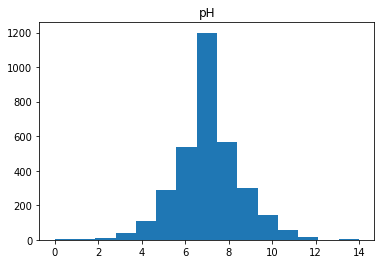

In [33]:
# Look at distribution of pH data
data.hist(column='pH', grid=False, bins=15)

array([[<AxesSubplot:title={'center':'Sulfate'}>]], dtype=object)

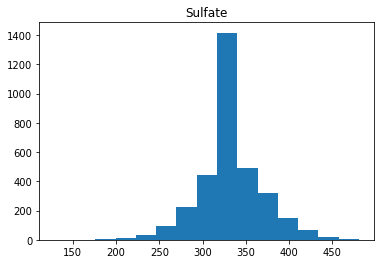

In [28]:
# Look at distribution of Sulfate data
data.hist(column='Sulfate', grid=False, bins=15)

array([[<AxesSubplot:title={'center':'Trihalomethanes'}>]], dtype=object)

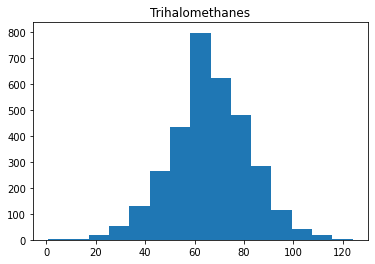

In [29]:
# Look at distribution of Trihalomethanes data
data.hist(column='Trihalomethanes', grid=False, bins=15)

<AxesSubplot:xlabel='Hardness', ylabel='Solids'>

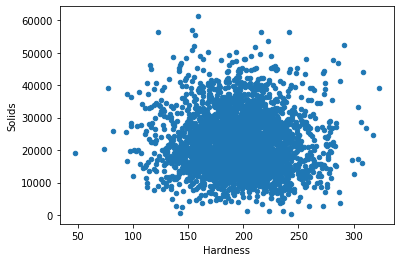

In [32]:
# Look at relationship between Hardness and Solids
data.plot.scatter(x='Hardness', y='Solids')

Based off the histograms, the data appears to be well balanced with a bell curve distribution. The scatter plot did not reveal a correlation between Hardness and Solids, which indicates that the attributes are independent of each other.